<a href="https://colab.research.google.com/github/ommalusare-arch/ES119_SEM_2_AY_25_26/blob/main/k_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Digit Dataset

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.images
y = digits.target

print(X.shape)
print(type(X[0][0][0])) # inspect the type of X, X[0], X[0][0], try to see if you can explain the output.


(1797, 8, 8)
<class 'numpy.float64'>


View the dataset

Data 
 [[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]] 
label  0
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


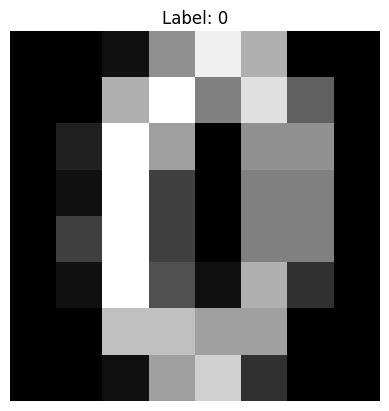

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.imshow(X[n], cmap="gray")
plt.title(f"Label: {y[n]}")
plt.axis("off")
plt.show()

#print("Data \n",X[n], "\nlabel ",y[n])
#print(y[:100])

Function to compute distance: Implement a function to compute the Euclidean distance of two matrices if you treat the matrices as vectors by flattening.

In [ ]:
import math
from numpy import sqrt
def distance(A,B):
  s=0
  for i in range(8):
    for j in range(8):
      s+=(A[i][j]-B[i][j])*(A[i][j]-B[i][j])
  return sqrt(s)


[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]] 7


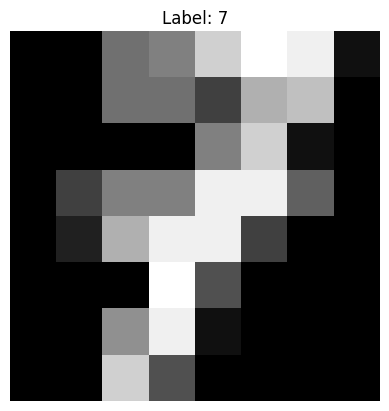

7 1796 [(np.float64(56.0), np.int64(0)), (np.float64(50.96076922496363), np.int64(1)), (np.float64(49.33558553417604), np.int64(2)), (np.float64(56.824290580701486), np.int64(3)), (np.float64(59.481089431852205), np.int64(4)), (np.float64(62.44997998398398), np.int64(5)), (np.float64(60.0), np.int64(6)), (np.float64(53.28226721902888), np.int64(8)), (np.float64(56.06246516163912), np.int64(9)), (np.float64(53.34791467339656), np.int64(0))]


In [ ]:
S=[]
samp=7 # Test sample
test=X[samp].copy()
plt.imshow(test, cmap="gray")
print(test, y[samp])
plt.title(f"Label: {y[samp]}")
plt.axis("off")
plt.show()
# Preparing the distance of samp with other points
for i in range(1797):
  d=distance(test,X[i])
  if d>0.001: # Q: Why is the test like this?
    S.append((distance(test,X[i]) , y[i] ))

print(y[samp],len(S),S[:10])

Note the differences between the sorting algorithms below and the one you implemented last time.

In [ ]:
def Isort(A):
  n=len(A)
  for i in range(1,n):
    j=i-1
    while(j>=0 and A[j][0]>A[j+1][0]):
      temp=A[j]
      A[j]=A[j+1]
      A[j+1]=temp
      j=j-1

print([0 for _ in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def kNearest(S,k):
  count=[0 for _ in range(10)]
  Isort(S)
  for i in range(k):
    count[S[i][1]]= count[S[i][1]] + 1
  a=max(count)
  for i in range(10):
    if(count[i]==a):
      return i

print(kNearest(S,200))




7


Problems:

1.   Implememnt k-nearest neighbour algorithm using Merger-sort. Your task is to replace the Isort function using a merge sort.
2.   Implement adaptive k-NN that had been covered in the class (see lecture notes).
3. Implement condensed k-NN (see lecture notes).




